# Random Forest Regression for Airline Fares  
Predict the exact ticket price and report:
- MSE / MAE  
- **Buffer-accuracy**: % of predictions within ±\$100


In [12]:
# 1) Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble       import RandomForestRegressor
from sklearn.metrics        import mean_squared_error, mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt


In [13]:
# 2) Load data 
df = pd.read_csv(r"C:\Users\jbats\airline-market-fare-prediction-data\Airline_Market_Fare_Prediction_Data\MarketFarePredictionData.csv")


(1581278, 26)
Index(['MktCoupons', 'OriginCityMarketID', 'DestCityMarketID',
       'OriginAirportID', 'DestAirportID', 'Carrier', 'NonStopMiles',
       'RoundTrip', 'ODPairID', 'Pax', 'CarrierPax', 'Average_Fare',
       'Market_share', 'Market_HHI', 'LCC_Comp', 'Multi_Airport', 'Circuity',
       'Slot', 'Non_Stop', 'MktMilesFlown', 'OriginCityMarketID_freq',
       'DestCityMarketID_freq', 'OriginAirportID_freq', 'DestAirportID_freq',
       'Carrier_freq', 'ODPairID_freq'],
      dtype='object')


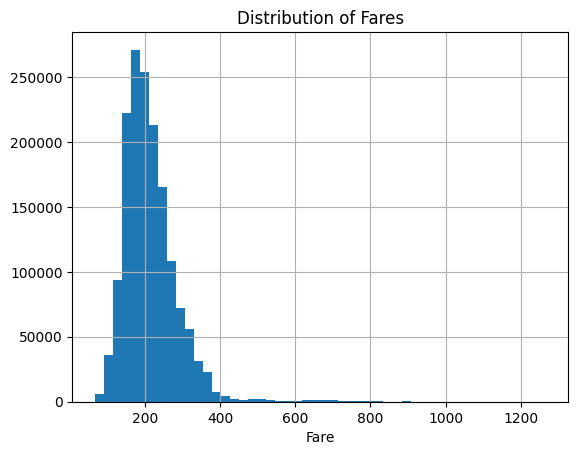

In [14]:
# 3) Quick look
print(df.shape)
print(df.columns)
df['Average_Fare'].hist(bins=50)
plt.title("Distribution of Fares"); plt.xlabel("Fare"); plt.show()


In [15]:
# 4) Features & target
features = ["MktMilesFlown", "NonStopMiles", "RoundTrip", "Carrier_freq"]
X = df[features]
y = df["Average_Fare"]


In [16]:
# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train/Test sizes:", X_train.shape, X_test.shape)


Train/Test sizes: (1265022, 4) (316256, 4)


In [17]:
# 6) Train Random Forest
model = RandomForestRegressor(
    n_estimators=100,    # you can tune this
    max_depth=10,        # try None or 10–20
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [18]:
# 7) Predict & compute regression metrics
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")


MSE: 859.62
MAE: 19.87


In [19]:
# 8) Buffer-accuracy: fraction within ±$50
buffer = 50
within_buffer = np.abs(y_pred - y_test) <= buffer
buf_acc = within_buffer.mean()
print(f"Buffer-accuracy (±${buffer}): {buf_acc:.3%}")


Buffer-accuracy (±$50): 92.749%


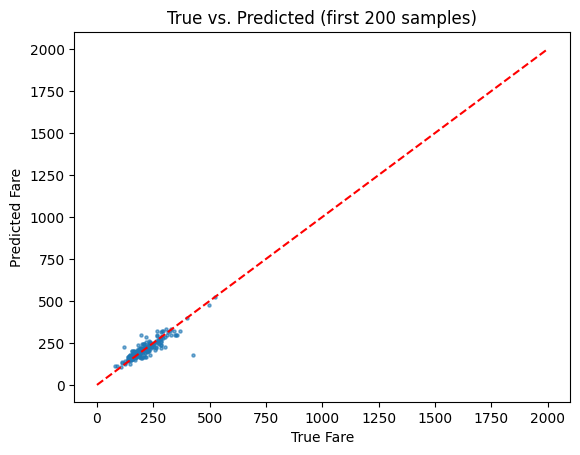

In [20]:
# 9) (Optional) Visualize true vs. predicted for a sample
plt.scatter(y_test[:200], y_pred[:200], s=5, alpha=0.6)
plt.plot([0,2000],[0,2000], 'r--')  # perfect‐prediction line
plt.xlabel("True Fare"); plt.ylabel("Predicted Fare")
plt.title("True vs. Predicted (first 200 samples)")
plt.show()


---
### Next Steps  
- **Hyperparameter tuning** with `GridSearchCV` on `n_estimators`, `max_depth`.  
- **Feature engineering**: add things like `Carrier`, `Pax`, airport pairs one-hot, etc.  
- Try **quantile regression forests** if you want prediction intervals.
